In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

df = pd.read_csv("Mall_Customers - Mall_Customers.csv")
display(df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40
...,...,...,...,...,...
198,199,Male,32.0,137.0,18
199,200,Male,30.0,137.0,83
200,201,Female,27.0,NaN,28
201,202,Male,NaN,137.0,19


In [104]:
total_missing = df.isnull().sum().sum()
print("Total number of missing values in the dataset:", total_missing)

Total number of missing values in the dataset: 3


In [105]:
# Check for missing values
cols = df.columns
print(cols)
#Counting null values
for x in cols:
  print(df[x].isnull().sum())

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
0
1
1
1
0


In [106]:
# Replace missing values for numerical features
df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].mean(), inplace=True)
df['Spending Score (1-100)'].fillna(df['Spending Score (1-100)'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Replace missing values for categorical features
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

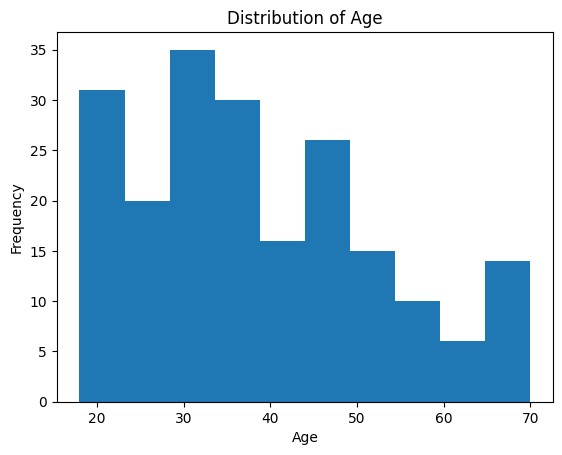

In [107]:
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [108]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Compute correlations only for numerical columns
correlation = df[numerical_columns].corr()['Spending Score (1-100)'].sort_values(ascending=False)

# Print the highest correlation with 'Spending Score (1-100)'
print("Highest correlation with 'Spending Score (1-100)':", correlation)

Highest correlation with 'Spending Score (1-100)': Spending Score (1-100)    1.000000
Annual Income (k$)        0.010274
CustomerID                0.006872
Age                      -0.323599
Name: Spending Score (1-100), dtype: float64


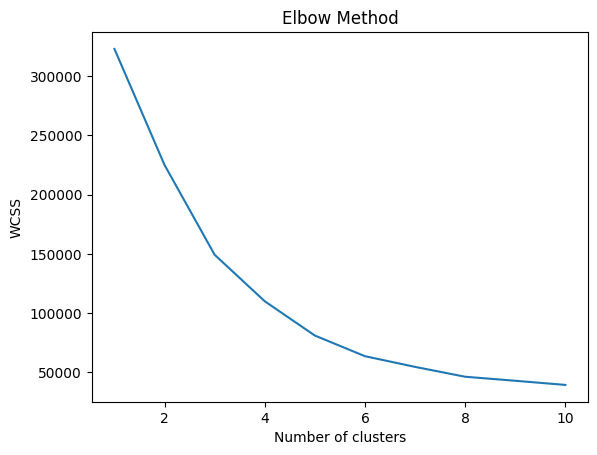

In [111]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# We can see that 5 is the optimal number of clusters

In [112]:
average_annual_income = df['Annual Income (k$)'].mean()
print("Average annual income : ", average_annual_income)

Average annual income :  61.31683168316832


In [113]:
# Assuming we have 5 clusters based on the Elbow Method
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df['Cluster'] = kmeans.labels_

cluster_income = df.groupby('Cluster')['Annual Income (k$)'].mean()
cluster_spending_score = df.groupby('Cluster')['Spending Score (1-100)'].mean()

average_income_spending_score = cluster_income + cluster_spending_score
highest_avg_cluster = average_income_spending_score.idxmax()
print("Cluster with highest average income and spending score : ", highest_avg_cluster)

Cluster with highest average income and spending score :  1


In [114]:
percentage_cluster_1 = (df['Cluster'] == 0).mean() * 100
print("Percentage of customers in Cluster 1 : ", percentage_cluster_1)

Percentage of customers in Cluster 1 :  11.330049261083744


In [115]:
most_frequent_age_cluster_2 = df[df['Cluster'] == 1]['Age'].mode()[0]
print("Most frequent age group in Cluster 2 : ", most_frequent_age_cluster_2)

Most frequent age group in Cluster 2 :  32.0


In [116]:
average_income_cluster_3 = df[df['Cluster'] == 2]['Annual Income (k$)'].mean()
print("Average income of customers in Cluster 3:", average_income_cluster_3)

Average income of customers in Cluster 3: 89.08108108108108


In [117]:
cluster_counts = df['Cluster'].value_counts()
print("Count of value in each cluster :\n", cluster_counts)

Count of value in each cluster :
 Cluster
4    81
1    40
2    37
0    23
3    22
Name: count, dtype: int64


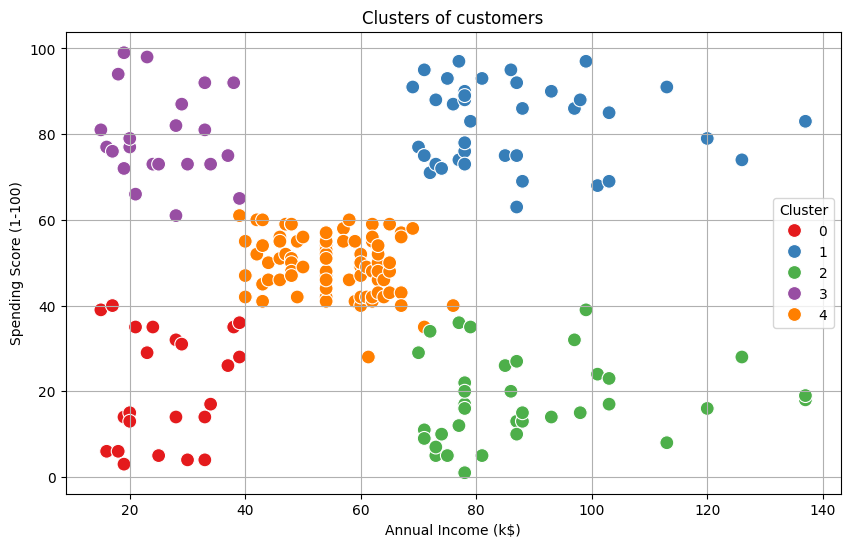

In [118]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)

plt.title('Clusters of customers')
plt.grid(True)
plt.show()